In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf

In [4]:
df = pd.read_csv('fake_reg.csv')

In [47]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


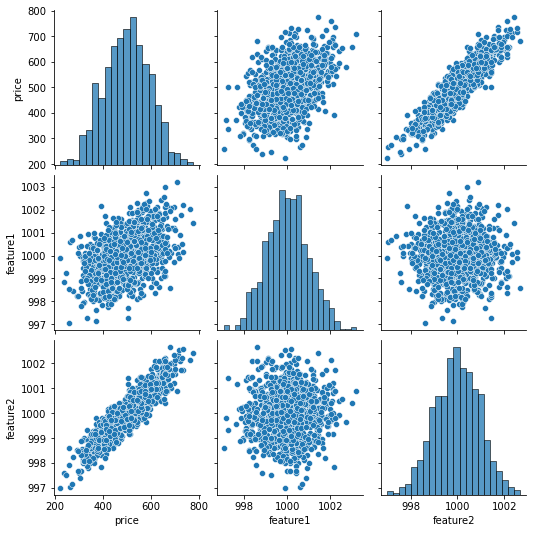

In [6]:
 sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1','feature2']].values

In [9]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [10]:
y = df['price'].values

In [11]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train =  scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense

In [23]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

In [24]:
model_type = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [48]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))#output layer

model.compile(optimizer = 'rmsprop',loss='mse')

In [49]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 771us/step - loss: 256655.7188
Epoch 2/250
22/22 [==============================] - 0s 816us/step - loss: 256550.0156
Epoch 3/250
22/22 [==============================] - 0s 861us/step - loss: 256437.4219
Epoch 4/250
22/22 [==============================] - 0s 861us/step - loss: 256308.5312
Epoch 5/250
22/22 [==============================] - 0s 771us/step - loss: 256161.7344
Epoch 6/250
22/22 [==============================] - 0s 771us/step - loss: 255996.2969
Epoch 7/250
22/22 [==============================] - 0s 756us/step - loss: 255811.2500
Epoch 8/250
22/22 [==============================] - 0s 770us/step - loss: 255605.4688
Epoch 9/250
22/22 [==============================] - 0s 771us/step - loss: 255378.1562
Epoch 10/250
22/22 [==============================] - 0s 725us/step - loss: 255125.2500
Epoch 11/250
22/22 [==============================] - 0s 680us/step - loss: 254846.6094
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 816us/step - loss: 10848.7715
Epoch 95/250
22/22 [==============================] - 0s 635us/step - loss: 8493.1611
Epoch 96/250
22/22 [==============================] - 0s 797us/step - loss: 6487.4956
Epoch 97/250
22/22 [==============================] - 0s 725us/step - loss: 4919.1362
Epoch 98/250
22/22 [==============================] - 0s 589us/step - loss: 3769.3030
Epoch 99/250
22/22 [==============================] - 0s 635us/step - loss: 3010.5715
Epoch 100/250
22/22 [==============================] - 0s 771us/step - loss: 2636.3967
Epoch 101/250
22/22 [==============================] - 0s 816us/step - loss: 2514.7661
Epoch 102/250
22/22 [==============================] - 0s 754us/step - loss: 2471.4102
Epoch 103/250
22/22 [==============================] - 0s 725us/step - loss: 2439.6313
Epoch 104/250
22/22 [==============================] - 0s 635us/step - loss: 2403.2371
Epoch 105/250
22/22 [==============================] - 0s 680

22/22 [==============================] - 0s 725us/step - loss: 288.3328
Epoch 189/250
22/22 [==============================] - 0s 635us/step - loss: 270.7977
Epoch 190/250
22/22 [==============================] - 0s 635us/step - loss: 258.2658
Epoch 191/250
22/22 [==============================] - 0s 729us/step - loss: 244.3708
Epoch 192/250
22/22 [==============================] - 0s 680us/step - loss: 231.8335
Epoch 193/250
22/22 [==============================] - 0s 589us/step - loss: 218.6146
Epoch 194/250
22/22 [==============================] - 0s 680us/step - loss: 205.6954
Epoch 195/250
22/22 [==============================] - 0s 725us/step - loss: 194.2699
Epoch 196/250
22/22 [==============================] - 0s 635us/step - loss: 182.2226
Epoch 197/250
22/22 [==============================] - 0s 680us/step - loss: 169.0040
Epoch 198/250
22/22 [==============================] - 0s 635us/step - loss: 157.4816
Epoch 199/250
22/22 [==============================] - 0s 544us/step

In [50]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

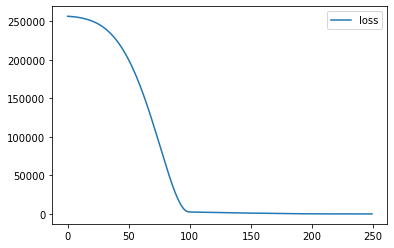

In [51]:
loss.plot()

In [52]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 703us/step - loss: 24.9436


24.943584442138672

In [53]:
model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 578us/step - loss: 24.0424


24.042444229125977

In [54]:
test_predictions = model.predict(X_test)

In [56]:
test_predictions

array([[405.14813],
       [623.2276 ],
       [591.80914],
       [572.03467],
       [366.65887],
       [578.925  ],
       [514.9748 ],
       [458.86377],
       [549.06885],
       [447.27286],
       [611.4793 ],
       [548.53986],
       [418.9593 ],
       [408.7614 ],
       [650.74835],
       [437.0896 ],
       [508.10315],
       [659.7227 ],
       [662.2976 ],
       [565.2097 ],
       [334.22058],
       [444.6711 ],
       [382.461  ],
       [378.62738],
       [566.3386 ],
       [610.3711 ],
       [532.17303],
       [427.6868 ],
       [655.19867],
       [413.87308],
       [442.4065 ],
       [484.9237 ],
       [438.23572],
       [681.5609 ],
       [424.50104],
       [417.60022],
       [501.54657],
       [550.2081 ],
       [509.62915],
       [395.36957],
       [618.24976],
       [416.4334 ],
       [604.12463],
       [445.67816],
       [501.77527],
       [581.2699 ],
       [668.53064],
       [490.1353 ],
       [318.43567],
       [485.23822],


In [57]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [58]:
test_predictions

0      405.148132
1      623.227600
2      591.809143
3      572.034668
4      366.658875
          ...    
295    528.875366
296    514.684631
297    609.333008
298    416.732117
299    410.788757
Length: 300, dtype: float32

In [59]:
pred_df  = pd.DataFrame(y_test,columns=['Test True Y'])

In [60]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [61]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [62]:
pred_df

,Test True Y,0
0,402.296319,405.148132
1,624.156198,623.227600
2,582.455066,591.809143
3,578.588606,572.034668
4,371.224104,366.658875
...,...,...
295,525.704657,528.875366
296,502.909473,514.684631
297,612.727910,609.333008
298,417.569725,416.732117


In [63]:
pred_df.columns = ['Test True Y','Model Predicted Y']

In [70]:
pred_df

,Test True Y,Model Predicted Y
0,402.296319,405.148132
1,624.156198,623.227600
2,582.455066,591.809143
3,578.588606,572.034668
4,371.224104,366.658875
...,...,...
295,525.704657,528.875366
296,502.909473,514.684631
297,612.727910,609.333008
298,417.569725,416.732117


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predicted Y'>

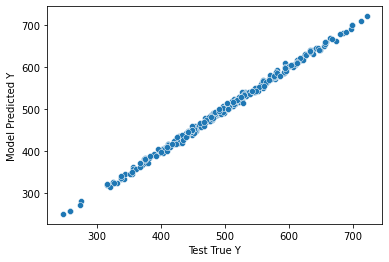

In [71]:
sns.scatterplot(x='Test True Y',y = 'Model Predicted Y',data = pred_df)

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [73]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predicted Y'])

4.003838846365718

In [75]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predicted Y'])

24.943582827602878

In [83]:
#Predict a random value
new_gem = [[998,1000]]

In [84]:
new_gem = scaler.transform(new_gem)

In [85]:
model.predict(new_gem)

array([[419.6767]], dtype=float32)

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model.save('my_model.h5')

In [88]:
new_model = load_model('my_model.h5')

In [89]:
new_model.predict(new_gem)

array([[419.6767]], dtype=float32)